# Telco Churn Classification Project

## Executive Summary

For my classification models, I used the following features and found that they work well for each type: 
 - Month-to-month contract
 - Fiber optic
 - Electronic check for payment
 - Two Year contract
 - Tenure

I chose my decision tree as my best model, because it had a 92% recall rate and had an accuracy of 80%. My baseline was 73%. 

# Importing 

In [49]:
# Our essentials
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

#Acquire functions
from acquire import get_connection, new_telco_churn_data, get_telco_churn_data

#Prepare functions
from prepare import num_distributions, clean_telco_churn, telco_churn_split, prep_telco_churn

#Explore functions
from explore import get_obj_stats, countplot, get_churn_heatmap, get_metrics_binary

#sklearn to help us with our machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Acquire Telco_Churn Data

In [50]:
#this acquire function will connect to the database, run a SQL query, & return telco_churn into a usable dataframe
#it will also create a .csv file in our directory.
df = get_telco_churn_data()

In [51]:
#seeing that it does look like how we would see it in SQL
df.head()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,1,3,0030-FNXPP,Female,0,No,No,3,Yes,...,No internet service,No internet service,No internet service,No,19.85,57.2,No,None,Month-to-month,Mailed check
1,2,1,3,0031-PVLZI,Female,0,Yes,Yes,4,Yes,...,No internet service,No internet service,No internet service,No,20.35,76.35,Yes,None,Month-to-month,Mailed check
2,1,1,3,0098-BOWSO,Male,0,No,No,27,Yes,...,No internet service,No internet service,No internet service,Yes,19.40,529.8,No,None,Month-to-month,Electronic check
3,1,1,3,0107-WESLM,Male,0,No,No,1,Yes,...,No internet service,No internet service,No internet service,Yes,19.85,19.85,Yes,None,Month-to-month,Electronic check
4,3,1,3,0114-RSRRW,Female,0,Yes,No,10,Yes,...,No internet service,No internet service,No internet service,Yes,19.95,187.75,No,None,Month-to-month,Bank transfer (automatic)


In [52]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

 - total_charges has 11 missing values (order by total_charges in SQL), going to fill in with the mean of total_charges
 - total_charges is an object, not a numeric data type
 - For project purposes, I'm going to change "no internet service" and "no phone service" to "No"
 - I'm going to create dummies and drop redundant columns
<br>
<br>
This should make our model binary for categoricals, and be ready to split

# Prepare Telco_Churn Data

In [59]:
#clean_telco_churn will create dummies, convert data to correct types, resolve nulls, and drop redundant columns
df = clean_telco_churn(df)

In [4]:
#prep function will split this clean data into train, validate, and test sets.
train, validate, test = prep_telco_churn(df)

In [5]:
#making sure they have the same amount of columns, while decreasing rows.
train.shape, validate.shape, test.shape

((3943, 28), (1691, 28), (1409, 28))

 - We have prepared and split our data, we can move onto exploration!

# Data Exploration

<AxesSubplot:title={'center':'Features Correlated with Churn'}>

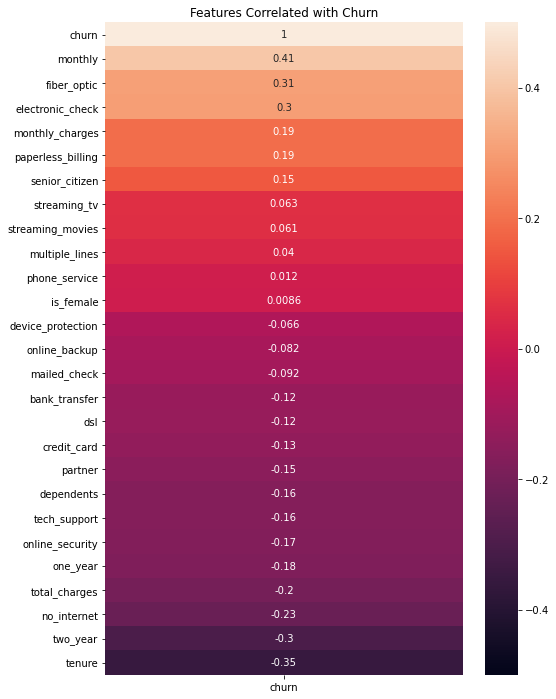

In [16]:
#Heatmaps will show us how much each feature is related to churn.
# -1 being strongest, negatively correlated
# +1 being strongest, positively correlated
get_churn_heatmap(df)

### Observations From Heatmap

- The top of the heatmap represents factors that are the most positively correlated to churn:
    <br>Monthly customers (.41)
    <br>Fiber optic users (.31)
    <br>Electronic check payers (.30)
   

- The bottom of the heatmap represents factors that are most negatively correlated to churn:
    <br> Tenure (-.35)
    <br> Two-year contracts (-.30)

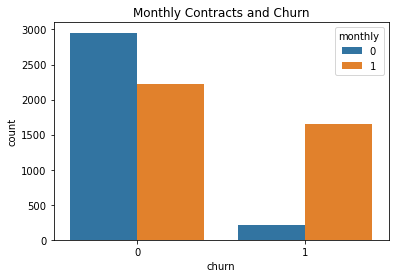

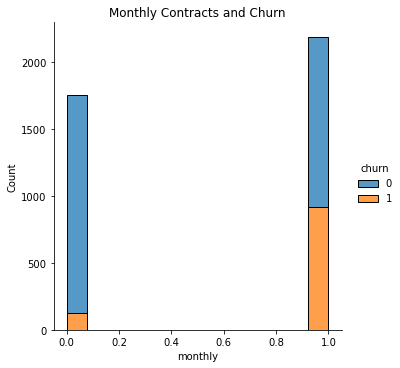

In [90]:
#
plt.subplots()
sns.countplot(data=df, hue='monthly' , x = 'churn') 
plt.title('Monthly Contracts and Churn')
plt.show()


sns.displot(train, x='monthly', hue = 'churn', multiple= 'stack')
plt.title('Monthly Contracts and Churn')
plt.show()

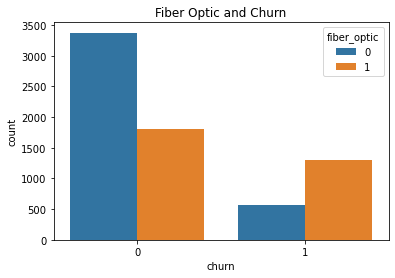

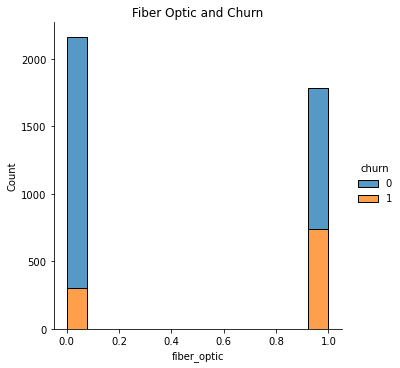

In [83]:
#We're going to visualize fiber optic use and churn
plt.subplots()
sns.countplot(data=df, hue='fiber_optic' , x = 'churn') 
plt.title('Fiber Optic and Churn')
plt.show()


sns.displot(train, x='fiber_optic', hue = 'churn', multiple= 'stack')
plt.title('Fiber Optic and Churn')
plt.show()

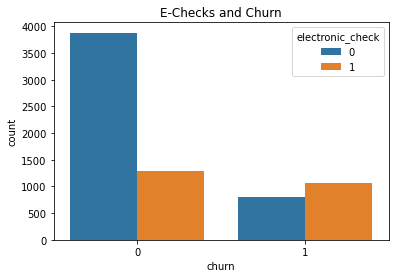

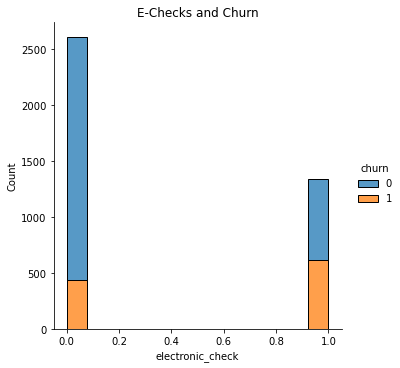

In [85]:
#Here, we're going to visualize electronic check payers and churn. 
plt.subplots()
sns.countplot(data=df, hue='electronic_check' , x = 'churn') 
plt.title('E-Checks and Churn')
plt.show()


sns.displot(train, x='electronic_check', hue = 'churn', multiple= 'stack')
plt.title('E-Checks and Churn')
plt.show()

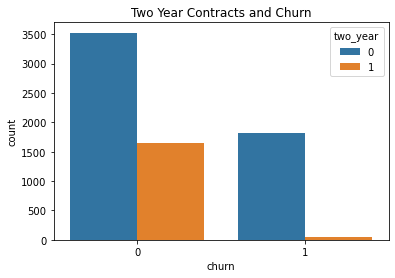

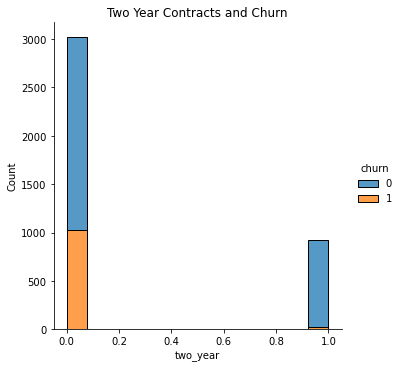

In [87]:
#Look at two year contracts and churn
plt.subplots()
sns.countplot(data=df, hue='two_year' , x = 'churn') 
plt.title('Two Year Contracts and Churn')
plt.show()


sns.displot(train, x='two_year', hue = 'churn', multiple= 'stack')
plt.title('Two Year Contracts and Churn')
plt.show()

Text(0.5, 1.0, 'Tenure (in months) and Churn')

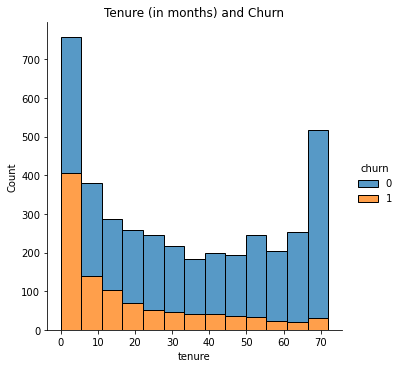

In [88]:
#last, visualize tenure (in months) and churn.
sns.displot(train, x="tenure",hue="churn", multiple='stack')
plt.title('Tenure (in months) and Churn')

#### Let's run some statistical testing

In [17]:
#Monthly Contracted Customers and Churn

Are they independent?
Is whether or not a customer churns independent of using monthly contracts?

In [86]:
#We are going to use a chi square test, because it compares two categorical variables.

#let's set up a null and alternative hypothesis

null_hypothesis =  "Monthly contracts and churn are independent of each other."
alternative_hypothesis =  "Monthly contracts and churn are not independent of each other."
a = 0.05 #a for alpha 

observed = pd.crosstab(train.monthly, train.churn, margins = True)
observed

churn,0,1,All
monthly,,,
0,1628,127,1755
1,1269,919,2188
All,2897,1046,3943


In [87]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

2.2197565476142607e-129

In [28]:
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

Reject null hypothesis that: Monthly contracts and churn are independent of each other.
There is evidence to suggest: Monthly contracts and churn are not independent of each other.


In [29]:
#Our chi square test is suggesting that churn may be dependent on monthly contracts.

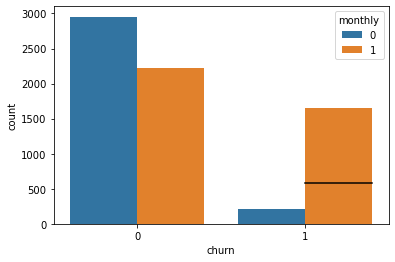

In [94]:
sns.countplot(data=df, hue = 'monthly', x='churn', )
plt.axhline(expected[1,1], xmin=.75, xmax=.95, color = 'black')
plt.show()

Takeaways:
 - If contract types were independent to churn, we would only expect 580 monthly customers to leave. However, it is sitting at 919. 
 - Monthly customers are probably more willing to leave since they aren't in any kind of long term commitment. 
 - Price sensitivity, low dissatisfication thresholds.

<br>

In [30]:
#Fiber Optic Users and Churn

In [95]:
null_hypothesis = "Using fiber optic and churning are independent of each other."
alternative_hypothesis = "Using fiber optic and churning are not independent of each other."
a = 0.05 #a for alpha 

observed = pd.crosstab(train.fiber_optic, train.churn, margins = True)
observed

churn,0,1,All
fiber_optic,,,
0,1858,304,2162
1,1039,742,1781
All,2897,1046,3943


In [96]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

2.5087626354447297e-81

In [97]:
expected[1,1]

472.4641136190718

In [33]:
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

Reject null hypothesis that: Using fiber optic and churning are independent of each other.
There is evidence to suggest: Using fiber optic and churning are not independent of each other.


In [34]:
#There's evidence to suggest that customers who use fiber optic and customers who churn are not independent.

<br>

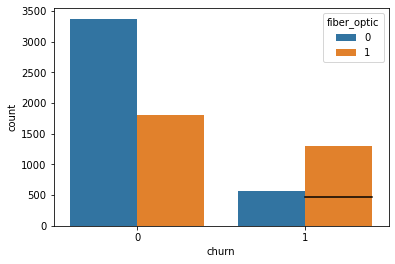

In [98]:
sns.countplot(data=df, hue = 'fiber_optic', x='churn')
plt.axhline(expected[1,1], xmin=.75, xmax=.95, color = 'black')
plt.show()
#black line represents expected churn for fiber optic 

Takeaways:
 - If a customer has fiber optic internet, they are more likely to churn than DSL/no internet.
 - Our expected model only had 472 churned customers with fiber optic, it is actually 742. 
 - Fiber optic was marketed to be able to perform tasks (at a typically higher cost) and customers didn't notice it. 

<br>

In [65]:
#Electronic Checks and Churn

In [99]:
null_hypothesis = "Paying with e-checks and churning are independent of each other."
alternative_hypothesis = "Paying with e-checks and churning are not independent of each other."
a = 0.05 #a for alpha 

observed = pd.crosstab(train.electronic_check, train.churn, margins = True)
observed

churn,0,1,All
electronic_check,,,
0,2173,434,2607
1,724,612,1336
All,2897,1046,3943


In [100]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

3.99605899267811e-82

In [101]:
expected[1,1]

354.4144052751712

In [102]:
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

Reject null hypothesis that: Paying with e-checks and churning are independent of each other.
There is evidence to suggest: Paying with e-checks and churning are not independent of each other.


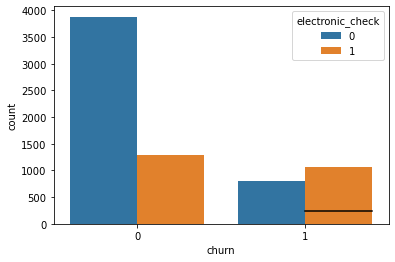

In [111]:
sns.countplot(data=df, hue = 'electronic_check', x='churn')
plt.axhline(expected[1,1], xmin=.75, xmax=.95, color = 'black')
plt.show()

Takeaways:
 - If electronic check and churn were independent, we would expect 354 e-check users to leave. We're actually at 612.
 - It could be that electronic checks are inconvenient (a long process) 

<br>

In [106]:
# Two Year Contracts & Churning

In [107]:
null_hypothesis = "Having a two year contract and churning are independent of each other."
alternative_hypothesis = "Having a two year contract and churning are not independent of each other."
a = 0.05 #a for alpha 

observed = pd.crosstab(train.two_year, train.churn, margins = True)
observed

churn,0,1,All
two_year,,,
0,1999,1022,3021
1,898,24,922
All,2897,1046,3943


In [108]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

3.2123527525742887e-75

In [109]:
expected[1,1]

244.58838447882323

In [110]:
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

Reject null hypothesis that: Having a two year contract and churning are independent of each other.
There is evidence to suggest: Having a two year contract and churning are not independent of each other.


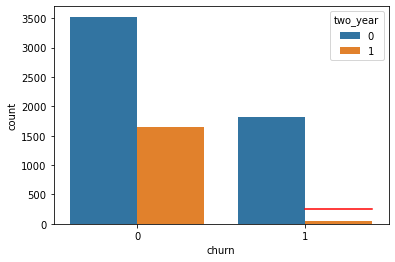

In [113]:
sns.countplot(data=df, hue = 'two_year', x='churn')
plt.axhline(expected[1,1], xmin=.75, xmax=.95, color = 'red')
plt.show()

Takeaways:
 - Customers with two year contracts tend to stay.
 - If contract type and churn were independent, we would expect 244 people to leave. However, only 24 did. 
 - Customers who sign a two year contract tend to be more loyal and satisifed with what Telco has to offer.
 - Penalties for leaving? 
 - It's probably saving them so much time. 

<br>

In [118]:
#Monthly tenure and churn

In [119]:
null_hypothesis = "Increasing tenure does not affect churn rate"
alternative_hypothesis = "Increasing tenure does affect churn rate"
a = 0.05 #a for alpha 

#this time we will be using a t test to compare means.
churned = train[train.churn==1]
stayed = train[train.churn==0]

t, p = stats.ttest_ind(churned.tenure, stayed.tenure)

In [121]:
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

Reject null hypothesis that: Increasing tenure does not affect churn rate
There is evidence to suggest: Increasing tenure does affect churn rate


Takeaways: 
 - Churn decreases as tenure increases. 
 - Reasonable, you'll stay with a company longer if you're happy with them.
 - Familiarity is a motive to stay.
 - Most customers churn within 0-10 months. 
 - Exponential decrease shape.

<br>

<br>

# Modeling

In [129]:
#we prepared the data earlier with the prep_telco_churn function. 
train.shape, validate.shape, test.shape

((3943, 27), (1691, 27), (1409, 27))

In [ ]:
# Let's begin by establishing a baseline accuracy. 

In [6]:
#x_cols are the features I'm focusing on to predict whether a customer churns or not. 
#y_col is our target
x_col = ['fiber_optic', 'electronic_check','tenure', 'two_year', 'monthly']
y_col = 'churn'

In [7]:
#splitting our data based on our features
X_train, y_train = train[x_col], train[y_col]

X_validate, y_validate = validate[x_col], validate[y_col]

X_test, y_test = test[x_col], test[y_col]

In [97]:
y_train.value_counts()

0    2897
1    1046
Name: churn, dtype: int64

In [35]:
#Since I can see most customers stayed, I will set my churn prediction to 0 for everyone. 
train['baseline_prediction'] = 0
round(accuracy_score(train.churn, train.baseline_prediction),2)

0.73

In [36]:
baseline_score = round(accuracy_score(train.churn, train.baseline_prediction),2)
print(f'Our baseline score is {baseline_score}')

Our baseline score is 0.73


<br>

Predictions end up 4 different ways:
 - TP: True Positive. We predicted the customer would stay & they did.
 - TN: True Negative. We predicted the customer would leave & they did.
 - FP: False Positive. We predicted the customer would stay & they didn't.
 - FN: False Negative. We predicted the customer would leave & they didn't.
    

In [143]:
#I am looking to optimize recall, because we want to maximize the number of actually positive cases we catch.
#In our case, let's say a positive case is a customer staying, because that's a good thing!
# If we can predict which ones will stay, we can focus on the ones that may leave.

## Decision Tree Model

In [12]:
#Going to create a decision tree under 'tree', I used max leaf nodes of 15 and max depth of 5. 
tree = DecisionTreeClassifier(max_leaf_nodes=15, max_depth=5)

In [13]:
#fit it to my training sample
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15)

In [14]:
#training and validate score, I want them to be better than the baseline and close to each other so I'm not overfitting
print(f'training score: {tree.score(X_train, y_train):.2%}')
print(f'validate score: {tree.score(X_validate, y_validate):.2%}')

training score: 79.99%
validate score: 78.30%


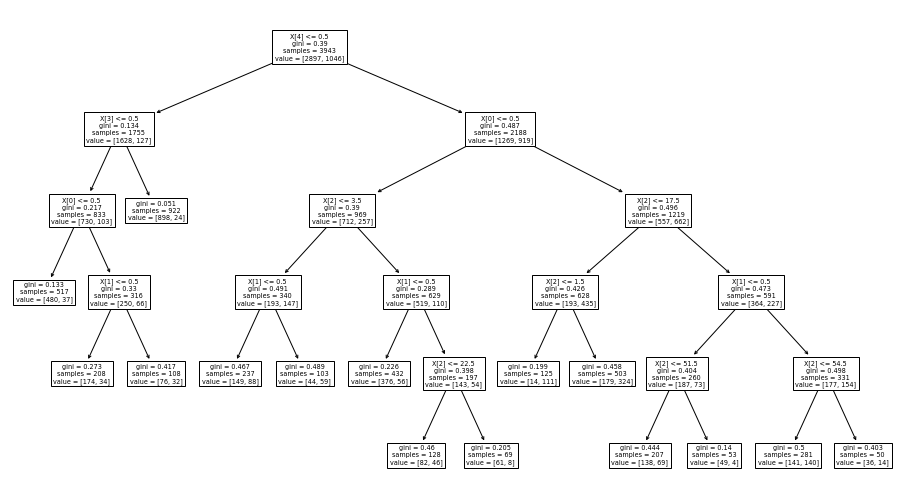

In [15]:
#What's my decision tree look like?
plt.figure(figsize=(16,9))
plot_tree(tree)
plt.show()

In [16]:
#making a prediction for churn, and also a classification report.
y_pred = tree.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      2897
           1       0.68      0.47      0.56      1046

    accuracy                           0.80      3943
   macro avg       0.75      0.70      0.71      3943
weighted avg       0.79      0.80      0.79      3943



In [91]:
print('Scores for Decision Tree!')
print('---------------------------')
print(f'Baseline score is {baseline_score}')
print(f'accuracy score is {round(sklearn.metrics.accuracy_score(y_train, y_pred),2)}')
print(f'precision score is {round(sklearn.metrics.precision_score(y_train, y_pred, pos_label =0),2)}')
print(f'recall score is {round(sklearn.metrics.recall_score(y_train, y_pred, pos_label =0),2)}')

Scores for Decision Tree!
---------------------------
Baseline score is 0.73
accuracy score is 0.8
precision score is 0.83
recall score is 0.92


In [38]:
#Our accuracy is better than our baseline score, and we have a pretty good recall.

<br>

# Logistic Regression

In [39]:
#set parameters for logistic regression, fit it, made predictions, and printed training and validate scores.
#they are also better than the baseline, and very close to each other.
logit = LogisticRegression(C= 10, random_state =123)
logit.fit(X_train, y_train)
y_pred = logit.predict(X_train)
print(f'training score: {logit.score(X_train, y_train):.2%}')
print(f'validate score: {logit.score(X_validate, y_validate):.2%}')

training score: 79.61%
validate score: 78.89%


In [41]:
#classification report.
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      2897
           1       0.65      0.50      0.57      1046

    accuracy                           0.80      3943
   macro avg       0.74      0.70      0.72      3943
weighted avg       0.78      0.80      0.79      3943



In [40]:
print('Scores for Logistic Regression!')
print('---------------------------')
print(f'Baseline score is {baseline_score}')
print(f'accuracy score is {round(sklearn.metrics.accuracy_score(y_train, y_pred),2)}')
print(f'precision score is {round(sklearn.metrics.precision_score(y_train, y_pred, pos_label =0),2)}')
print(f'recall score is {round(sklearn.metrics.recall_score(y_train, y_pred, pos_label =0),2)}')

Scores for Logistic Regression!
---------------------------
Baseline score is 0.73
accuracy score is 0.8
precision score is 0.83
recall score is 0.9


In [42]:
#Our accuracy is better than our baseline score, and we have a pretty good recall here too.

<br>

## KNN 

In [116]:
#setting up and fitting my KNN model 
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [117]:
#let's see the training and validate scores
print(f'training score: {knn.score(X_train, y_train):.2%}')
print(f'validate score: {knn.score(X_validate, y_validate):.2%}')

training score: 78.95%
validate score: 76.17%


In [118]:
#classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      2897
           1       0.68      0.47      0.56      1046

    accuracy                           0.80      3943
   macro avg       0.75      0.70      0.71      3943
weighted avg       0.79      0.80      0.79      3943



In [119]:
print('Scores for KNN!')
print('---------------------------')
print(f'Baseline score is {baseline_score}')
print(f'accuracy score is {round(sklearn.metrics.accuracy_score(y_train, y_pred),2)}')
print(f'precision score is {round(sklearn.metrics.precision_score(y_train, y_pred, pos_label =0),2)}')
print(f'recall score is {round(sklearn.metrics.recall_score(y_train, y_pred, pos_label =0),2)}')

Scores for KNN!
---------------------------
Baseline score is 0.73
accuracy score is 0.8
precision score is 0.83
recall score is 0.92


# Test

In [27]:
#the actual results and the predicted results to make a classification report
actual_test = y_test
predicted_test = tree.predict(X_test)
print(classification_report(actual_test, predicted_test))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1035
           1       0.68      0.44      0.54       374

    accuracy                           0.80      1409
   macro avg       0.75      0.68      0.70      1409
weighted avg       0.78      0.80      0.78      1409



In [122]:
#let's see the training, validate, and test score. All better than the baseline of 73.4%
print(f'training score: {tree.score(X_train, y_train):.2%}')
print(f'validate score: {tree.score(X_validate, y_validate):.2%}')
print(f'test score: {tree.score(X_test, y_test):.2%}')

training score: 79.99%
validate score: 78.30%
test score: 79.63%


<br>

# Predictions

In [123]:
#I'm going to be making a .csv containing the test sample with predictions from my chosen model

In [8]:
#let's take a look at our test so far...
test.head()

,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,dsl,fiber_optic,no_internet,monthly,one_year,two_year,bank_transfer,credit_card,electronic_check,mailed_check
3960,2592-HODOV,0,0,0,13,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2131,7426-GSWPO,1,0,0,64,1,1,1,1,0,...,0,1,0,1,0,0,1,0,0,0
5313,9378-FXTIZ,0,1,0,54,1,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
4295,1017-FBQMM,0,1,1,62,1,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
772,1193-RTSLK,0,0,0,38,1,0,1,1,1,...,0,1,0,1,0,0,0,1,0,0


In [29]:
#The features I used for my model
features = ['fiber_optic', 'electronic_check','tenure', 'two_year', 'monthly']

In [22]:
#my decision tree's probabilities
proba_test = tree.predict_proba(X_test)

In [23]:
#turning my probabilities into a dataframe we can use to combine into our predictions in a bit
proba_df = pd.DataFrame(proba_test, columns=tree.classes_.tolist())
proba_df.head()

,0,1
0,0.928433,0.071567
1,0.924528,0.075472
2,0.928433,0.071567
3,0.836538,0.163462
4,0.666667,0.333333


In [24]:
#reset the index
reset_test = test.reset_index()
reset_test.head()

,index,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,fiber_optic,no_internet,monthly,one_year,two_year,bank_transfer,credit_card,electronic_check,mailed_check,prediction
0,3960,2592-HODOV,0,0,0,13,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
1,2131,7426-GSWPO,1,0,0,64,1,1,1,1,...,1,0,1,0,0,1,0,0,0,0
2,5313,9378-FXTIZ,0,1,0,54,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0
3,4295,1017-FBQMM,0,1,1,62,1,1,0,1,...,1,0,0,1,0,0,1,0,0,0
4,772,1193-RTSLK,0,0,0,38,1,0,1,1,...,1,0,1,0,0,0,1,0,0,0


In [25]:
#concatenate resetted test and the probabilities. 
test_proba_df = pd.concat([reset_test, proba_df], axis=1)
test_proba_df.head()

,index,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,monthly,one_year,two_year,bank_transfer,credit_card,electronic_check,mailed_check,prediction,0,1
0,3960,2592-HODOV,0,0,0,13,1,0,0,0,...,0,1,0,0,1,0,0,0,0.928433,0.071567
1,2131,7426-GSWPO,1,0,0,64,1,1,1,1,...,1,0,0,1,0,0,0,0,0.924528,0.075472
2,5313,9378-FXTIZ,0,1,0,54,1,1,0,0,...,0,1,0,0,1,0,0,0,0.928433,0.071567
3,4295,1017-FBQMM,0,1,1,62,1,1,0,1,...,0,1,0,0,1,0,0,0,0.836538,0.163462
4,772,1193-RTSLK,0,0,0,38,1,0,1,1,...,1,0,0,0,1,0,0,0,0.666667,0.333333


In [32]:
#adding my predicted result column
test_proba_df['predicted'] = predicted_test
test_proba_df.head()

,index,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,one_year,two_year,bank_transfer,credit_card,electronic_check,mailed_check,prediction,0,1,predicted
0,3960,2592-HODOV,0,0,0,13,1,0,0,0,...,1,0,0,1,0,0,0,0.928433,0.071567,0
1,2131,7426-GSWPO,1,0,0,64,1,1,1,1,...,0,0,1,0,0,0,0,0.924528,0.075472,0
2,5313,9378-FXTIZ,0,1,0,54,1,1,0,0,...,1,0,0,1,0,0,0,0.928433,0.071567,0
3,4295,1017-FBQMM,0,1,1,62,1,1,0,1,...,1,0,0,1,0,0,0,0.836538,0.163462,0
4,772,1193-RTSLK,0,0,0,38,1,0,1,1,...,0,0,0,1,0,0,0,0.666667,0.333333,0


In [46]:
#only keeping the relevant columns
telco_prediction = test_proba_df[['customer_id', 'fiber_optic','electronic_check','tenure','two_year','monthly',0,1, 'predicted']]
telco_prediction.tail()

,customer_id,fiber_optic,electronic_check,tenure,two_year,monthly,0,1,predicted
1404,1731-TVIUK,1,1,4,0,1,0.355865,0.644135,1
1405,4628-WQCQQ,1,1,35,0,0,0.703704,0.296296,0
1406,5887-IKKYO,1,0,58,1,0,0.973970,0.026030,0
1407,4931-TRZWN,0,1,13,0,1,0.640625,0.359375,0
1408,1396-QWFBJ,1,0,21,0,1,0.666667,0.333333,0


In [48]:
#to a csv it goes
telco_prediction.to_csv('telco_predictions.csv')